## Import Data

In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# print current working directory
print(os.getcwd())

C:\Users\User\Desktop\2020_DataPilot\Code


In [3]:
# Change working directory
os.chdir('C:\\Users\\User\\Desktop\\2020_DataPilot\\Data') 
print(os.getcwd())

C:\Users\User\Desktop\2020_DataPilot\Data


In [5]:
#Import data
Full_PChome = pd.read_excel('2020datapilot_PChome.xlsx')
# Rename columns
Full_PChome = Full_PChome.rename(columns={"消費者編號(member_id) " : "member_id", "郵遞區號(postal_cd)" : "postal_cd",\
                                        "訂單日期(date_cd)" : "date_cd","商品編號(prod_id)" : "prod_id",\
                                        "商品名稱(goods)" : "goods","商品類別(department)" : "department",\
                                        "商品專區(index)" : "index","商品數量(prod_Q)" : "prod_Q",\
                                        "商品單價(price)" : "price","建議售價(MSRP)" : "MSRP"})
Full_PChome.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,6490,NaN
1,4663689,600,day1,QFAXAS-A900A38S1-001,【HappyLife】桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,599,NaN
2,8097088,815,day1,QFAAJY-A9009W99R-000,【dayneeds】輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,927,1359.0
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,690,990.0
4,15438512,704,day1,CGAACT-A80423382-005,車用攝影鏡頭,運動戶外,汽百/記錄器,1,1055,1600.0


In [6]:
# Full_PChome info
Full_PChome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   member_id   60000 non-null  int64  
 1   postal_cd   60000 non-null  int64  
 2   date_cd     60000 non-null  object 
 3   prod_id     60000 non-null  object 
 4   goods       59998 non-null  object 
 5   department  60000 non-null  object 
 6   index       60000 non-null  object 
 7   prod_Q      60000 non-null  int64  
 8   price       60000 non-null  int64  
 9   MSRP        46436 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 4.6+ MB


In [15]:
# Full_PChome continuous variable describe
pd.set_option('float_format', '{:.1f}'.format)
Full_PChome.iloc[:,-3:].describe()

,prod_Q,price,MSRP
count,60000.0,60000.0,46436.0
mean,1.2,3507.7,4636.5
std,1.1,17366.7,10952.0
min,1.0,0.0,1.0
25%,1.0,490.0,750.0
50%,1.0,990.0,1599.0
75%,1.0,2699.0,3699.0
max,20.0,2580000.0,281000.0


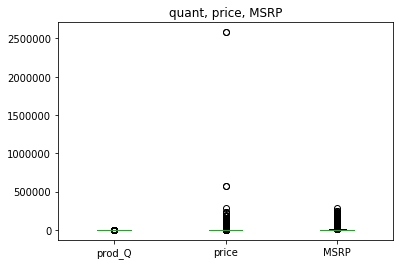

In [29]:
# Full_PChome continuous variable box plot
Full_PChome.iloc[:,-3:].plot(kind = 'box', title = 'quant, price, MSRP')

In [13]:
# Outliers (not within 1.5 IQR)
def Outlier(S1):
    Q1 = np.percentile(S1, 25)
    Q3 = np.percentile(S1, 75)
    step = 1.5*(Q3 - Q1)
    Outlier_Index = ~((S1 >= Q1 - step)&(S1 <= Q3 + step))
    return Outlier_Index

Price Outlier proportion = 0.13


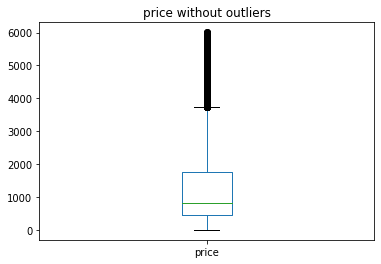

In [28]:
# Plot price without outliers
Full_PChome['price'].loc[~Outlier(Full_PChome['price'])].plot(kind = 'box',title = 'price without outliers')
print('Price Outlier proportion = %s'%round(Outlier(Full_PChome['price']).sum()/Full_PChome['price'].count(),2))

## Day analysis

In [12]:
# date_cd unique
print(Full_PChome['date_cd'].unique(),'\nUnique count of day:',Full_PChome['date_cd'].nunique())

['day1' 'day2' 'day3' 'day4' 'day5' 'day6' 'day7' 'day8' 'day9' 'day10'
 'day11' 'day12' 'day13' 'day14' 'day15' 'day16' 'day17' 'day18' 'day19'
 'day20' 'day21' 'day22' 'day23' 'day24' 'day25' 'day26' 'day27' 'day28'
 'day29' 'day30' 'day31' 'day32' 'day33' 'day34' 'day35' 'day36' 'day37'
 'day38' 'day39' 'day40' 'day41' 'day42' 'day43' 'day44' 'day45' 'day46'
 'day47' 'day48' 'day49' 'day50' 'day51' 'day52' 'day53' 'day54' 'day55'
 'day56' 'day57' 'day58' 'day59' 'day60' 'day61' 'day62' 'day63' 'day64'
 'day65' 'day66' 'day67' 'day68' 'day69' 'day70' 'day71' 'day72' 'day73'
 'day74' 'day75' 'day76' 'day77' 'day78' 'day79' 'day80' 'day81' 'day82'
 'day83' 'day84' 'day85' 'day86' 'day87' 'day88' 'day89' 'day90' 'day91'
 'day92'] 
Unique count of Ticker: 92


In [44]:
# date_cd Frequency table describe
pd.value_counts(Full_PChome['date_cd']).to_frame().reset_index().describe()

,date_cd
count,92.0
mean,652.2
std,284.2
min,416.0
25%,525.5
50%,603.5
75%,693.2
max,2526.0


Text(82, 2215, '2019.12.27')

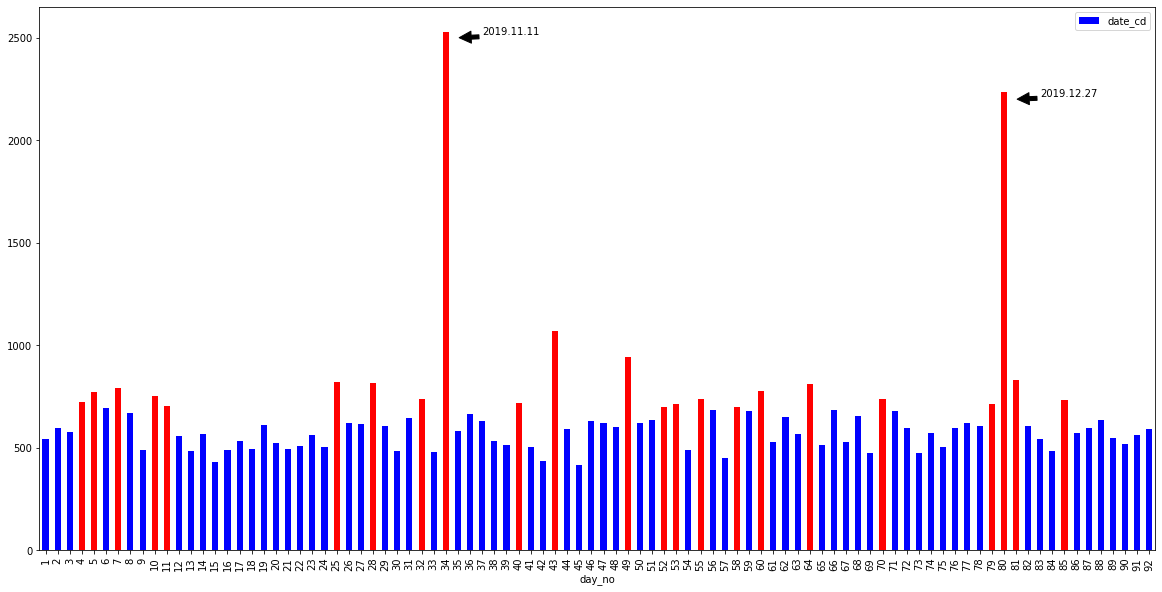

In [22]:
# date_cd Frequency table plot
date_cd_f = pd.value_counts(Full_PChome['date_cd']).to_frame().reset_index()
date_cd_f['day_no'] = date_cd_f['index'].str.split('y', expand = True)[1].astype('int')
date_cd_f = date_cd_f.drop(['index'], axis = 1)
date_cd_f = date_cd_f.sort_values(by = 'day_no').set_index('day_no')
ax = date_cd_f.plot(kind = 'bar',color = [np.where(date_cd_f["date_cd"]>693, 'r', 'b')],figsize = (20,10))
ax.annotate('2019.11.11', xy=(34, 2500), xytext=(36, 2515),arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('2019.12.27', xy=(80, 2200), xytext=(82, 2215),arrowprops=dict(facecolor='black', shrink=0.05))

In [6]:
#Import data
Date_Map = pd.read_csv('Date_Map.csv')

# Merge date
Full_PChome = Full_PChome.merge(Date_Map, how = 'left')
Full_PChome['date_create'] = pd.to_datetime(Full_PChome['date_create'])
Full_PChome.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP,date_create
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,6490,NaN,2019-10-09
1,4663689,600,day1,QFAXAS-A900A38S1-001,【HappyLife】桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,599,NaN,2019-10-09
2,8097088,815,day1,QFAAJY-A9009W99R-000,【dayneeds】輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,927,1359.0,2019-10-09
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,690,990.0,2019-10-09
4,15438512,704,day1,CGAACT-A80423382-005,車用攝影鏡頭,運動戶外,汽百/記錄器,1,1055,1600.0,2019-10-09


## Goods Analysis

In [7]:
# Fix view Chinese problem 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定預設字型:解決plot不能顯示中文問題
mpl.rcParams['axes.unicode_minus'] = False           # 解決儲存影象是負號'-'顯示為方塊的問題

In [15]:
# Trim Whitespace in cols
Full_PChome['department'] = Full_PChome['department'].str.strip()
Full_PChome['index'] = Full_PChome['index'].str.strip()
Full_PChome['goods'] = Full_PChome['goods'].str.strip()

In [7]:
# department Amount
print('department Amount :%s'%(Full_PChome['department'].nunique()))

department Amount :13


#### Department

In [12]:
# Create Price*Quantity
Full_PChome['P_Q'] = Full_PChome['prod_Q'] * Full_PChome['price']

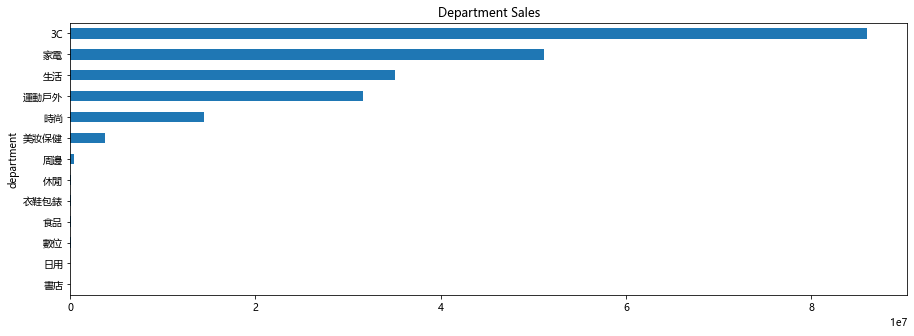

In [16]:
# Create Price*Quantity
Full_PChome['P_Q'] = Full_PChome['prod_Q'] * Full_PChome['price']

# Group by department
df_gp = Full_PChome.groupby('department').sum()['P_Q'].map(lambda x: round(x,2))
df_gp.sort_values(ascending=True).plot(kind = 'barh',figsize = (15,5), title = 'Department Sales')

#### Department, Index

In [18]:
# index Amount
print('index Amount :%s'%(Full_PChome['index'].nunique()))

index Amount :193


In [38]:
# Group by department, index
df_gp = Full_PChome.groupby(['department', 'index']).sum()['P_Q'].map(lambda x: round(x,2))

# Top 20 index Sales
df_gp.sort_values(ascending=False).to_frame().head(20)

P_Q
department index          
3C         預購     25850454
           筆記電腦   15646210
運動戶外       機車/部品  14035073
3C         智慧手機    9938816
生活         傢俱      9881373
家電         音響劇院    8758441
3C         南紡3C    6335838
家電         液晶電視    6163750
時尚         瑞士錶     5901772
家電         電器商城    5504695
           南紡家電    3964985
3C         三井3C    3945865
時尚         黃金      3552123
家電         廚房家電    3307247
生活         燈飾      3282973
3C         數位相機    2939060
           藍牙/耳機   2828226
生活         衛浴      2627474
3C         列 印     2610888
家電         冰箱      2566137

#### Department, Index, Goods

In [39]:
# goods Amount
print('index Amount :%s'%(Full_PChome['goods'].nunique()))

index Amount :30913


In [40]:
# Group by department, index, goods
df_gp = Full_PChome.groupby(['department', 'index', 'goods']).mean()['P_Q'].map(lambda x: round(x,2))

# Top 20 Goods Sales
df_gp.sort_values(ascending=False).to_frame().head(20)

P_Q
department index   goods                                                        
家電         音響劇院    Audio Valve Challenger 400 單聲道後級擴大機                 2580000.0
時尚         瑞士錶     ROLEX 勞力士 海使116610LV  專業潛水錶綠水鬼                       573000.0
                   ROLEX 勞力士126300 Datejust 蠔式恆動易調鏈帶腕錶藍面-41mm           284000.0
                   CHANEL 香奈兒 2019新款透背款H5705 38mm 時尚女王鑽面款 Automati...   232000.0
運動戶外       Johnson FUJIIRYOKI 富士醫療器JP-1100按摩椅-米色                        228000.0
時尚         黃金      Jove gold 幸運守護神黃金條塊-15公克三塊(共45公克)                    199998.0
           瑞士錶     ROLEX 勞力士 116000 熱門藍面3.6.9 36mm 五年保固                 194600.0
           黃金      Jove Gold 漾金飾 富貴福人黃金男項鍊(約20.20錢)(約2尺/60cm)           186780.0
                   Jove gold 幸運守護神黃金條塊-伍台錢三塊(共15台錢)                     170832.0
3C         數位相機    Canon EOS 1DX MarkII 單機身 *(中文平輸)                     156900.0
時尚         瑞士錶     Longines 浪琴 Evidenza 典藏系列金馬彩繪限量機械錶 L27068902         153425.0
           黃金      煌隆 壹台兩黃金條塊                                           149998.0
                   Taiwan Precious Metals黃金條塊 - 壹台兩                     149998.0
運動戶外       機車/部品   YAMAHA R15 雙碟 155- 全新進口車                             149800.0
時尚         瑞士錶     PANERAI 沛納海LUMINOR BASE LOGO PAM00773                145000.0
運動戶外       機車/部品   HONDA CBR150R-全新進口車                                  145000.0
                   SUZUKI GSX R150 跑車版                                  129999.0
時尚         黃金      Jove gold 圓滿黃金項鍊(約15.30錢)(約2尺60cm)                   129800.0
運動戶外       機車/部品   HONDA MSX 125 SF ABS全新進口車 (平行輸入原裝進口)                 123600.0
                   YAMAHA MT-15 - 全新進口車                                 123000.0

## Customer Analysis

In [41]:
# Customer Amount during 3 months
print('Customer Amount during 3 months :%s'%(Full_PChome['member_id'].nunique()))

Customer Amount during 3 months :36345


In [42]:
# Group by department, index
df_gp = Full_PChome.groupby('member_id').sum()['P_Q'].map(lambda x: round(x,2))
df_gp.sort_values(ascending=False).to_frame().head(20)

,P_Q
member_id,
2400440,5160000
17871662,2245276
14685763,1868927
17719417,1146000
14255682,1084578
17407874,785860
11521175,735971
17797544,696000
13823048,603680


## Discount Analysis

In [8]:
# MSRP Null Rate
print('MSRP Null Rate is :%s'%round((Full_PChome['MSRP'].isnull().sum())/Full_PChome['MSRP'].count(),2))

# Fill NA of MSRP with original price
list_ = []
for i,j in zip(Full_PChome['price'], Full_PChome['MSRP']):
    if np.isnan(j) == True:
        list_.append(i)
    else:
        list_.append(j)
Full_PChome['New_MSRP'] = list_

MSRP Null Rate is :0.29


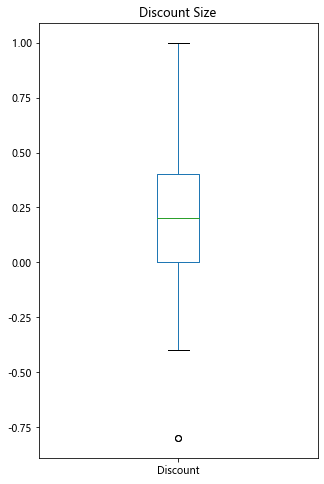

In [9]:
# Count the discount
Full_PChome['Discount'] = round((Full_PChome['New_MSRP'] - Full_PChome['price']) / Full_PChome['New_MSRP'],1)

# Discount describe
Full_PChome['Discount'].plot(kind = 'box', figsize = (5,8), title = 'Discount Size')

In [11]:
# create year, month, day
Full_PChome['Year'] = Full_PChome['date_create'].map(lambda x: x.year)
Full_PChome['Month'] = Full_PChome['date_create'].map(lambda x: x.month)
Full_PChome['Day'] = Full_PChome['date_create'].map(lambda x: x.day)

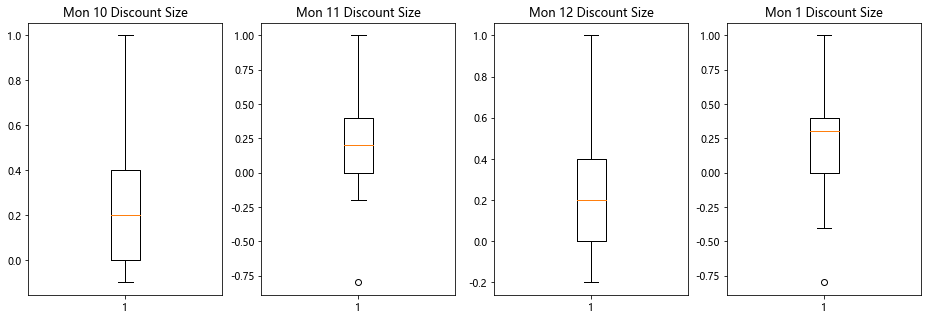

In [52]:
# plot discount by month
plt.figure(figsize=(16, 5)) 
for i,j in enumerate(Full_PChome['Month'].unique()):
    plt.subplot(1,4,i+1)
    plt.boxplot(Full_PChome.loc[Full_PChome['Month'] == j]['Discount'])
    plt.title('Mon %s Discount Size'%j)

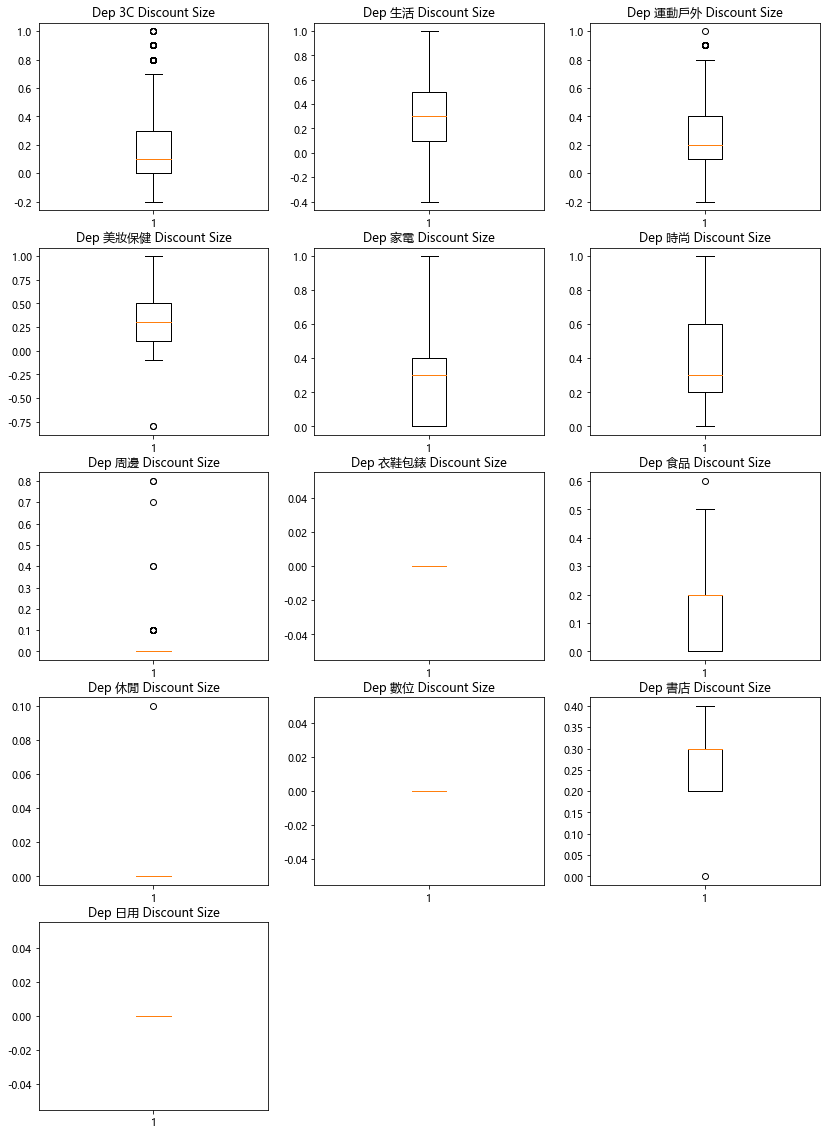

In [58]:
# plot discount by department
plt.figure(figsize=(14, 20)) 
for i,j in enumerate(Full_PChome['department'].unique()):
    plt.subplot(5,3,i+1)
    plt.boxplot(Full_PChome.loc[Full_PChome['department'] == j]['Discount'])
    plt.title('Dep %s Discount Size'%j)

## Region Analysis

In [19]:
# Zip Map
Zip_Map = pd.read_excel('Zip_Code.xls')
Zip_Map = Zip_Map.dropna()
Zip_Map['Zip_Code'] = Zip_Map['Zip_Code'].astype('str')
Zip_Map.head()

,Region,Zip_Code
0,臺北市,100
1,臺北市,103
2,臺北市,104
3,臺北市,105
4,臺北市,106


In [20]:
# Map the Location
Full_PChome['Zip_Code'] = Full_PChome['postal_cd'].astype('str')
Full_PChome =  Full_PChome.merge(Zip_Map, how = 'left')
Full_PChome.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP,date_create,P_Q,New_MSRP,Discount,Zip_Code,Region
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,6490,NaN,2019-10-09,6490,6490.0,0.0,831,高雄市
1,4663689,600,day1,QFAXAS-A900A38S1-001,【HappyLife】桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,599,NaN,2019-10-09,599,599.0,0.0,600,嘉義市
2,8097088,815,day1,QFAAJY-A9009W99R-000,【dayneeds】輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,927,1359.0,2019-10-09,927,1359.0,0.3,815,高雄市
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,690,990.0,2019-10-09,690,990.0,0.3,708,臺南市
4,15438512,704,day1,CGAACT-A80423382-005,車用攝影鏡頭,運動戶外,汽百/記錄器,1,1055,1600.0,2019-10-09,1055,1600.0,0.3,704,臺南市


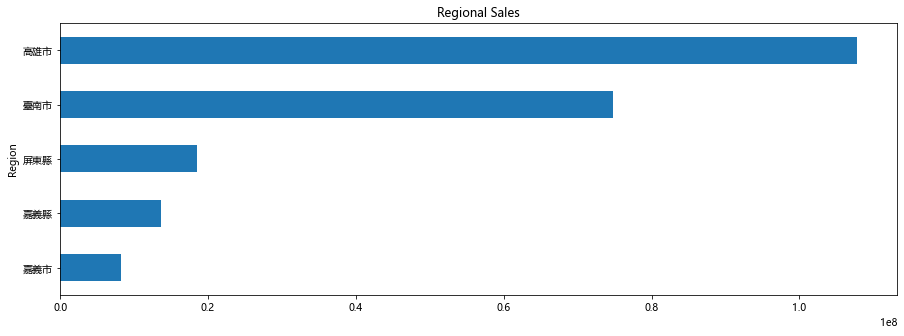

In [21]:
# Group by Region
df_gp = Full_PChome.groupby('Region').sum()['P_Q'].map(lambda x: round(x,2))
df_gp.sort_values(ascending=True).plot(kind = 'barh',figsize = (15,5), title = 'Regional Sales')

In [28]:
# Full_PChome_sameID_buy_over_1same_prods
GP_1 = Full_PChome.groupby(['member_id','Region','department','index','goods'])
GP_1.size().loc[GP_1.size()>1].sort_values(ascending=False).to_csv('Full_PChome_sameID_buy_over_1same_prods.csv',\
                                                                   encoding = 'ANSI')